# Context

- The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

- Can you predict if the customer is going to honor the reservation or cancel it ?

# Import Libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
from ydata_profiling import ProfileReport

pd.set_option("display.max_columns", 75)


# Load data

In [2]:
df = pd.read_csv(r"/home/western/Documents/Data/Hotel Reservations.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Checking for duplicates

In [4]:
df.duplicated().sum()

0

## Class Distribution 

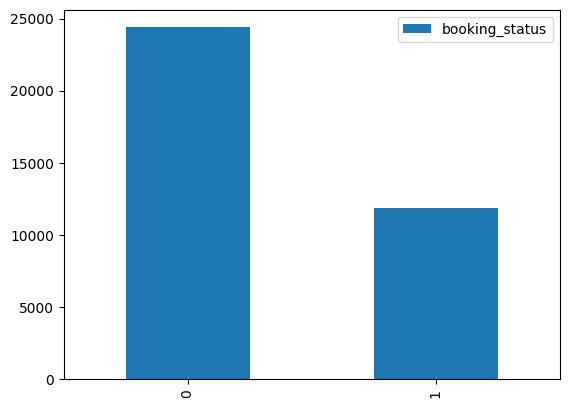

In [5]:
booking = df['booking_status'].value_counts().reset_index()
booking.plot(kind='bar');

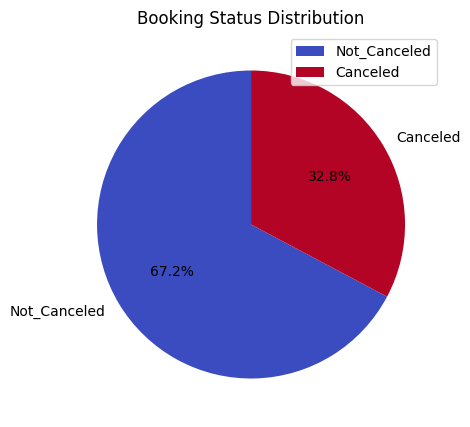

In [6]:
# Count occurrences of each category in 'booking_status'
booking = df['booking_status'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(5, 5))  # Set figure size
booking.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', legend=True)

# Customize labels and title
plt.ylabel('')  # Remove y-axis label for clarity
plt.title('Booking Status Distribution')

# Show the plot
plt.show()

In [7]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Feature engeneering 

### Total number of guests 

In [8]:
df['total_guests'] = df['no_of_adults'] + df['no_of_children']
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


### Total Stay duration 

In [9]:
df['total_booking_days'] = df['no_of_week_nights'] + df['no_of_weekend_nights']
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,total_booking_days
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2,2


In [10]:
year = df['arrival_year'].value_counts().reset_index(name='count')
year

,index,count
0,2018,29761
1,2017,6514


In [11]:
# Drop columns
df = df.drop(columns = ['Booking_ID', 'arrival_year', 'arrival_date', 'no_of_week_nights',
                       'no_of_weekend_nights', 'no_of_adults', 'no_of_children'], errors='ignore')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   type_of_meal_plan                     36275 non-null  object 
 1   required_car_parking_space            36275 non-null  int64  
 2   room_type_reserved                    36275 non-null  object 
 3   lead_time                             36275 non-null  int64  
 4   arrival_month                         36275 non-null  int64  
 5   market_segment_type                   36275 non-null  object 
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  booking_status 

In [13]:
data = df.copy()

In [14]:
df.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,total_booking_days
0,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled,2,3
1,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled,2,5
2,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled,1,3
3,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled,2,2
4,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled,2,2


# Modeling 

In [15]:
# Classification algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

## Data Preprocessing 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   type_of_meal_plan                     36275 non-null  object 
 1   required_car_parking_space            36275 non-null  int64  
 2   room_type_reserved                    36275 non-null  object 
 3   lead_time                             36275 non-null  int64  
 4   arrival_month                         36275 non-null  int64  
 5   market_segment_type                   36275 non-null  object 
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  booking_status 

## Label encode the target variable 

In [17]:
# Define categorical columns to encode
categorical_columns = ['booking_status']


# Initialize a dictionary to store LabelEncoders (for potential inverse transformation)
label_encoders = {}

# Loop through categorical columns and apply Label Encoding (overwrite existing column)
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()  # Initialize LabelEncoder
    df[col] = label_encoders[col].fit_transform(df[col])  # Overwrite original column

# Display the modified DataFrame
df.head()

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,total_booking_days
0,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,1,2,3
1,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,1,2,5
2,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,0,1,3
3,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,0,2,2
4,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,0,2,2


In [18]:
df['booking_status'].unique()

array([1, 0])

## One hot encoding of categorical columns 

In [19]:
# Define categorical columns to encode
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [20]:
categorical_columns = categorical_columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Loop through categorical columns and apply encoding
encoded_dfs = []  

for col in categorical_columns:
    encoded_array = encoder.fit_transform(df[[col]])  # Fit & transform column
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([col]))  # Convert to DataFrame
    encoded_dfs.append(encoded_df)  # Store in list

# Concatenate all encoded columns and drop original categorical columns
df_encoded = pd.concat([df.drop(columns=categorical_columns)] + encoded_dfs, axis=1)

# Display the final encoded DataFrame
df = df_encoded.copy()
df.head()

,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests,total_booking_days,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0,224,10,0,0,0,65.00,0,1,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,5,11,0,0,0,106.68,1,1,2,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,2,0,0,0,60.00,0,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,211,5,0,0,0,100.00,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,48,4,0,0,0,94.50,0,0,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Define target and independent features 

In [21]:
# Define the features 

df = df.dropna()

# Defining the dependent variables/features
X = df.drop(columns={'booking_status'})

# Target variable 
y = df['booking_status']


## Split to training and testing 

In [22]:
# Split into training and temporary sets (70% train, 30% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)


In [23]:

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data

X_test_scaled = scaler.transform(X_test)


## Logistic Regression 

In [24]:
# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the Logistic Regression model
lg_model = LogisticRegression(random_state=42)

# Perform cross-validation and compute the F1 score
cv_scores = cross_val_score(lg_model, X_train_scaled, y_train, cv=kf, scoring='f1_macro')

# Print cross-validation results
print("Cross-validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))



Cross-validation F1 Scores: [0.77382911 0.77285212 0.77069449 0.7569472  0.77465164 0.76371621
 0.76300401 0.74109475 0.77679295 0.76257365]
Mean F1 Score: 0.7656156128777064


In [25]:
# Train on training data 

lg_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred = lg_model.predict(X_test_scaled)

# Print the classification report
print('Classification Report on Validation Set:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix on Validation Set:')
print(confusion_matrix(y_test, y_pred))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3566
           1       0.83      0.89      0.86      7317

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883

Confusion Matrix on Validation Set:
[[2251 1315]
 [ 779 6538]]


## Decision Tree

In [26]:
# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the Logistic Regression model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation and compute the F1 score
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=kf, scoring='f1_macro')

# Print cross-validation results
print("Cross-validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))



Cross-validation F1 Scores: [0.83446065 0.84248906 0.85289802 0.82101339 0.84819804 0.84595681
 0.84384066 0.80955164 0.85345134 0.84119051]
Mean F1 Score: 0.8393050142039058


In [27]:
# Train on training data 

dt_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred = dt_model.predict(X_test_scaled)

# Print the classification report
print('Classification Report on Validation Set:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix on Validation Set:')
print(confusion_matrix(y_test, y_pred))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      3566
           1       0.90      0.90      0.90      7317

    accuracy                           0.86     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.86      0.86      0.86     10883

Confusion Matrix on Validation Set:
[[2836  730]
 [ 747 6570]]


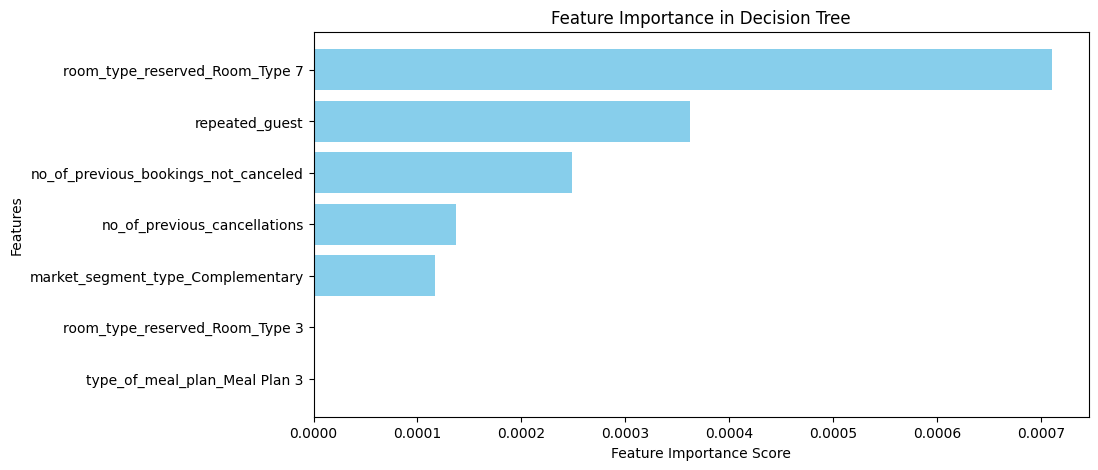

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Get Feature Importances
feature_importances = dt_model.feature_importances_

# Convert X_train_scaled to a DataFrame if needed
feature_names = X_train.columns  # Use original DataFrame column names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[16:25]

# Plot Feature Importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


## Hyperparameter Search 

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': np.linspace(0.0, 0.1, 5),
    'random_state': [42]  # Ensures reproducibility
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_classifier, param_distributions=param_dist, scoring='f1_macro',
    cv=3, n_iter=20, n_jobs=-1, random_state=42, error_score='raise'
)

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best model from the random search
best_dt_model = random_search.best_estimator_

# Make predictions on the testing data
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Print the classification report for the best model
print("Classification Report for Best Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Print the best hyperparameters found during the search
print("Best Hyperparameters:", random_search.best_params_)


Classification Report for Best Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3566
           1       0.85      0.91      0.88      7317

    accuracy                           0.83     10883
   macro avg       0.81      0.79      0.80     10883
weighted avg       0.82      0.83      0.82     10883

Best Hyperparameters: {'splitter': 'random', 'random_state': 42, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}


In [30]:
# Print the confusion matrix
print('Confusion Matrix on Validation Set:')
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix on Validation Set:
[[2368 1198]
 [ 671 6646]]


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


In [44]:
#Step 1: Handle Class Imbalance Using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [45]:
# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the Logistic Regression model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation and compute the F1 score
cv_scores = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=kf, scoring='f1_macro')

# Print cross-validation results
print("Cross-validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))


Cross-validation F1 Scores: [0.89926544 0.8925182  0.88167598 0.88549947 0.88755065 0.88140227
 0.89249142 0.88693056 0.87871797 0.89569339]
Mean F1 Score: 0.8881745340640345


In [46]:
# Perform cross-validation and compute the F1 score
cv_scores = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=kf, scoring='f1_macro')

In [47]:
cv_scores 

array([0.89926544, 0.8925182 , 0.88167598, 0.88549947, 0.88755065,
       0.88140227, 0.89249142, 0.88693056, 0.87871797, 0.89569339])

In [48]:
# Define Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation prediction
y_pred_cv = cross_val_predict(dt_model, X_train_resampled, y_train_resampled, cv=kf)

# Print classification report
print("Classification Report for Cross-Validation Predictions:")
print(classification_report(y_train_resampled, y_pred_cv))

Classification Report for Cross-Validation Predictions:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     17073
           1       0.90      0.88      0.89     17073

    accuracy                           0.89     34146
   macro avg       0.89      0.89      0.89     34146
weighted avg       0.89      0.89      0.89     34146



In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, random_state=42)

# Train the model on the resampled dataset
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set (not resampled)
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8633648810070752
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      3566
           1       0.90      0.89      0.90      7317

    accuracy                           0.86     10883
   macro avg       0.84      0.85      0.85     10883
weighted avg       0.86      0.86      0.86     10883



In [60]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Initialize undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Check new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after undersampling:", dict(zip(unique, counts)))


Class distribution after undersampling: {0: 8319, 1: 8319}


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled dataset
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set (not resampled)
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8422310024809335
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3566
           1       0.92      0.84      0.88      7317

    accuracy                           0.84     10883
   macro avg       0.82      0.84      0.83     10883
weighted avg       0.85      0.84      0.84     10883



In [62]:
print(confusion_matrix(y_test, y_pred))

[[3010  556]
 [1161 6156]]
